In [1]:
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get the stock quote
df =  web.DataReader('NKE', data_source = 'yahoo', start = '2012-01-01' , end='2022-11-01')

In [3]:
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,24.497499,24.174999,24.342501,24.202499,10944400.0,21.412823
2012-01-04,24.687500,24.127501,24.177500,24.555000,9440800.0,21.724693
2012-01-05,24.645000,24.250000,24.447500,24.540001,8393200.0,21.711422
2012-01-06,24.625000,24.379999,24.482500,24.497499,7760800.0,21.673822
2012-01-09,24.732500,24.424999,24.525000,24.587500,10045600.0,21.753437
...,...,...,...,...,...,...
2022-10-26,94.349998,90.699997,90.779999,92.389999,8648200.0,92.389999
2022-10-27,93.480003,90.220001,92.879997,90.540001,8617900.0,90.540001
2022-10-28,93.879997,90.459999,91.199997,93.830002,6022400.0,93.830002


In [4]:
#get the numbe of rows and columns in the dataset
df.shape

(2727, 6)

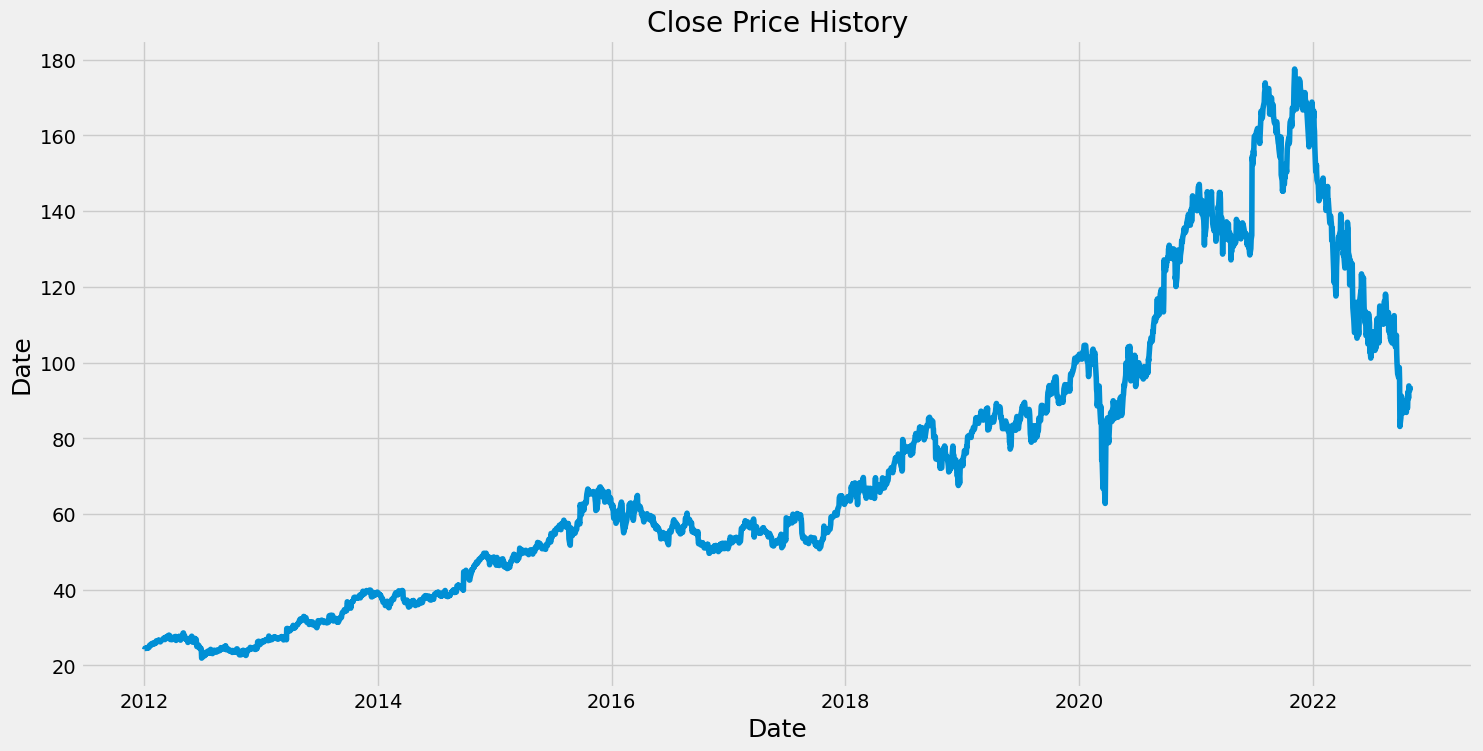

In [5]:
#visualize the closing price history
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Date', fontsize = 18)
plt.show()

In [6]:
#Create a new dataframe with only the Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2182

In [7]:
#Scale the data before it is presented to a neural network
scaler = MinMaxScaler(feature_range=(0,1)) #class
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01451162],
       [0.01677756],
       [0.01668114],
       ...,
       [0.46208983],
       [0.45469741],
       [0.46170411]])

In [8]:
#Create the training data set 
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train adn y_train data sets
x_train = []
y_train = []

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.01451162, 0.01677756, 0.01668114, 0.01640793, 0.01698647,
       0.01717932, 0.01664899, 0.01819175, 0.01690612, 0.01841674,
       0.02102016, 0.02217723, 0.0224665 , 0.02214508, 0.02318966,
       0.02479671, 0.02333431, 0.02302896, 0.02508598, 0.0260502 ,
       0.02566452, 0.02416996, 0.02526275, 0.02519847, 0.0264359 ,
       0.02916788, 0.02889468, 0.02833222, 0.02802687, 0.0302928 ,
       0.03024459, 0.0295375 , 0.03037316, 0.02759297, 0.02884647,
       0.02950535, 0.02974641, 0.03116061, 0.03157844, 0.03236589,
       0.03336226, 0.03368367, 0.03448719, 0.0314338 , 0.0318195 ,
       0.03233376, 0.03567641, 0.03482467, 0.03692991, 0.03619067,
       0.0368817 , 0.03766915, 0.03913155, 0.0385048 , 0.03641565,
       0.03729952, 0.03156237, 0.03337834, 0.03230161, 0.03125704])]
[0.03225339948597891]



In [9]:
#Convert the x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)


In [10]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #x_train[0] = 2122is the number of samples ; 
#x_train.shape[1] = 60 is the number of real time steps and 1 is the number of features
x_train.shape

(2122, 60, 1)

In [11]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-19 14:12:29.695159: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-19 14:12:29.695243: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2022-11-19 14:12:30.098077: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-19 14:12:31.083334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-19 14:12:31.217639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-19 14:12:31.330313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-19 14:12:31.456795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   1/2122 [..............................] - ETA: 1:01:02 - loss: 5.9250e-04

2022-11-19 14:12:31.682069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2122/2122 [==============================] - 60s 27ms/step - loss: 4.3226e-04
